# About the Data
Some of the original structure are deleted or censored. For those are left:
Basic data like:
 

class: categorical, initially students were divided into 2 classes, yet teachers suspect that of different classes students may performance significant differently.


race: categorical and censored

GPA: real numbers, float

Some teachers assume that scores of math curriculums can represent one's likelihood perfectly:

Algebra: real numbers, Advanced Algebra
……

Some assume that background of students can affect their choices and likelihood significantly, which are all censored as:

from1: students' home locations

from2: a probably bad indicator for preference on mathematics

from 3: how did students apply for this university (undergraduate)

from4: a probably bad indicator for family background. 0 with more wealth, 4 with more poverty

The final indicator y:
0, one fails to apply for the graduate school, who may apply again or search jobs in the future
1, success, inland
2, success, abroad

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [18]:
df= pd.read_csv("Students data.csv")

In [19]:
df.head()

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0


# Cleaning Data

In [20]:
df.shape

(105, 17)

In [21]:
df["from3"].value_counts()

A    81
D    10
S     6
C     4
B     4
Name: from3, dtype: int64

In [22]:
df["race"].value_counts()

1    81
3     6
7     5
4     4
5     4
2     3
6     2
Name: race, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   105 non-null    int64  
 1   class                105 non-null    object 
 2   gender               105 non-null    object 
 3   race                 105 non-null    int64  
 4   GPA                  105 non-null    float64
 5   Algebra              105 non-null    int64  
 6   Calculus1            105 non-null    int64  
 7   Calculus2            105 non-null    int64  
 8   Statistics           105 non-null    int64  
 9   Probability          105 non-null    int64  
 10  Measure              105 non-null    int64  
 11  Functional_analysis  105 non-null    int64  
 12  from1                105 non-null    object 
 13  from2                105 non-null    object 
 14  from3                105 non-null    object 
 15  from4                105 non-null    int

In [24]:
df.duplicated().sum()

0

In [25]:
df["Calculus1"] = (df.Calculus1 + df.Calculus2)/2

In [26]:
df.head()

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,84.0,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50.5,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,59.5,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,55.0,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,54.0,63,60,66,66,61,E,A,A,0,0


In [27]:
df.drop(columns=["ID" , "race" , "from1" , "from2" , "from3" , "Calculus2"],inplace=True)

In [28]:
df.rename(columns={"y":"gradute" ,"Calculus1":"TotleCalculus" , "from4":"cash_status"} , inplace=True)

In [29]:
df.head()

,class,gender,GPA,Algebra,TotleCalculus,Statistics,Probability,Measure,Functional_analysis,cash_status,gradute
0,A,male,73.47,64,84.0,60,74,71,60,3,0
1,A,female,71.22,57,50.5,51,55,62,61,2,0
2,A,female,74.56,47,59.5,60,61,68,64,0,1
3,A,female,72.89,46,55.0,60,29,54,51,0,0
4,A,female,70.11,49,54.0,60,66,66,61,0,0


In [30]:
# df.to_csv("Students Data Analysis New.csv")

# Explore and Analysis Data

In [31]:
df["GPA"].describe()

count    105.000000
mean      82.957048
std        6.053187
min       63.490000
25%       79.340000
50%       84.110000
75%       87.300000
max       93.710000
Name: GPA, dtype: float64

# Data is Normal or not (Out layer)

Text(0.5, 1.0, 'know data is normal or not')

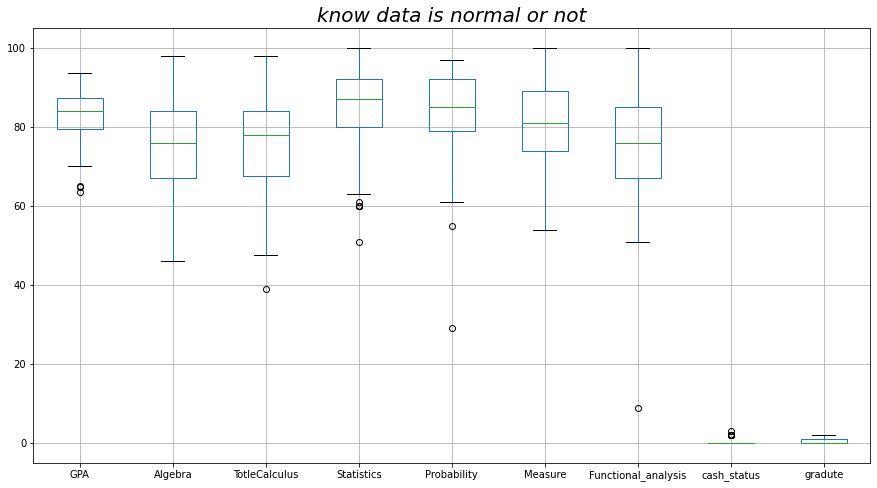

In [32]:
plt.figure(figsize=(15, 8))
df.boxplot();
plt.title("know data is normal or not" , color= "black" , fontstyle= "italic" , fontsize=  20)

# Find a Relation Between Data

<AxesSubplot:>

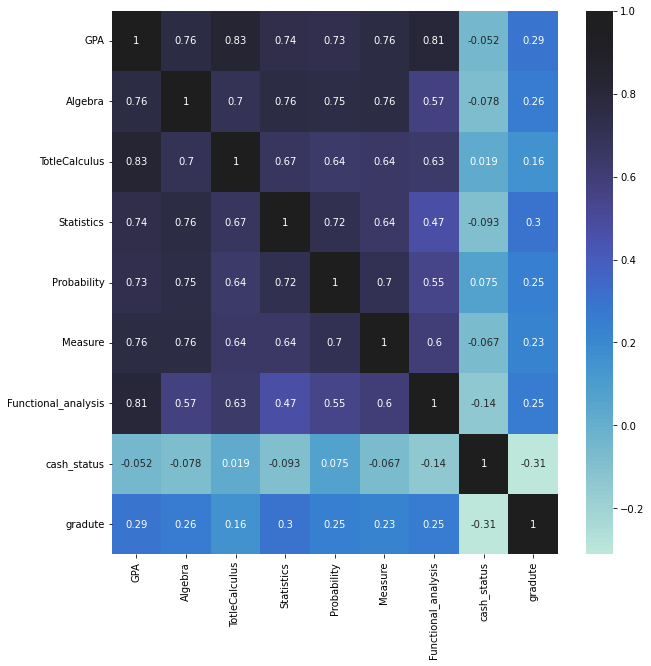

In [33]:
plt.figure(figsize=(10 ,10))
sns.heatmap(df.corr() , annot=True , center= True)

#  Q1: What is The Most Class have a Students?

A    76
B    29
Name: class, dtype: int64


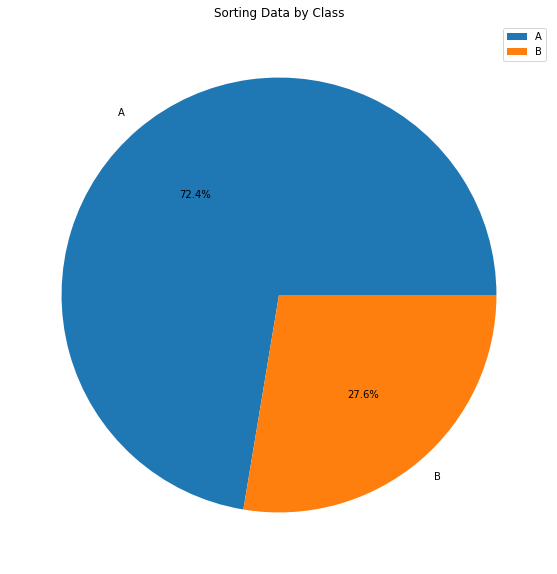

In [34]:
index= df["class"].value_counts().index
values= df["class"].value_counts().values

plt.figure(figsize=(10, 10));
print(df["class"].value_counts())

plt.title("Sorting Data by Class")
plt.pie(x= values , labels=  index ,  autopct= "%1.1f%%");

plt.legend();

# Q2: What is The Most Gender (F&M) in Dataset?

female    68
male      37
Name: gender, dtype: int64


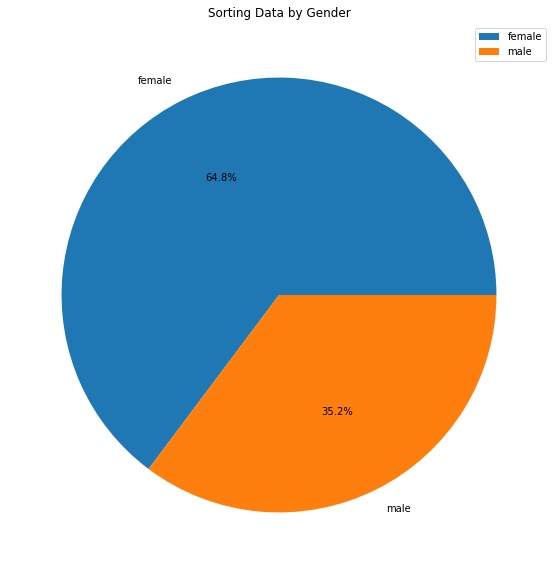

In [35]:
index= df["gender"].value_counts().index
values= df["gender"].value_counts().values

plt.figure(figsize=(10, 10));
print(df["gender"].value_counts())

plt.title("Sorting Data by Gender")
plt.pie(x= values , labels=  index ,  autopct= "%1.1f%%");

plt.legend();
plt.show()

# Q3: Top GPA by Gender?

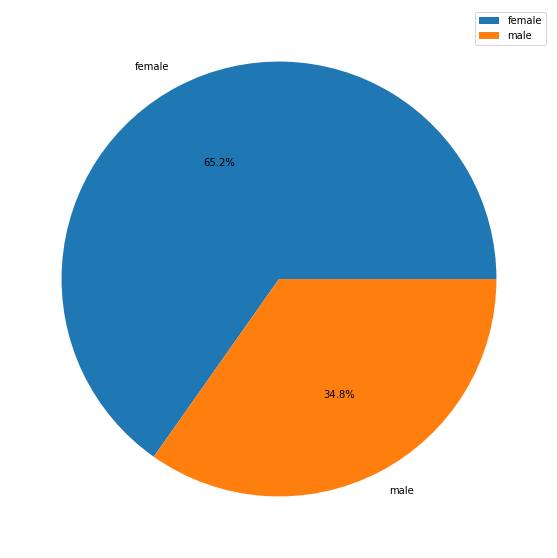

In [36]:
index= df.groupby("gender").GPA.sum().index
values= df.groupby("gender").GPA.sum().values

plt.figure(figsize=(10, 10));
plt.pie(x= values , labels= index , autopct="%1.1f%%")

plt.legend()
plt.show()

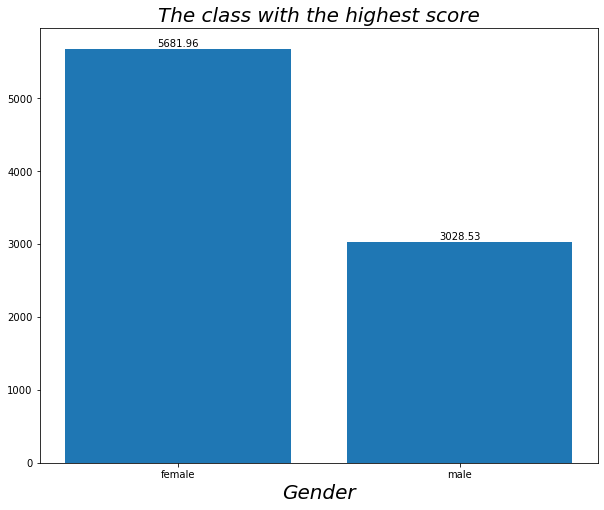

In [37]:
plt.figure(figsize=(10, 8))

plt.bar(x= index , height=values)
plt.title("The class with the highest score" , fontsize=20 , fontstyle= "italic" );
plt.xlabel("Gender" , fontsize=20 , fontstyle= "italic" );

for i in range(len(values)):
    plt.text(i , values[i] , values[i] , ha='center',va='bottom')
plt.show()

In [38]:
df.head()

,class,gender,GPA,Algebra,TotleCalculus,Statistics,Probability,Measure,Functional_analysis,cash_status,gradute
0,A,male,73.47,64,84.0,60,74,71,60,3,0
1,A,female,71.22,57,50.5,51,55,62,61,2,0
2,A,female,74.56,47,59.5,60,61,68,64,0,1
3,A,female,72.89,46,55.0,60,29,54,51,0,0
4,A,female,70.11,49,54.0,60,66,66,61,0,0


# Q3: Top GPA by Gender (10 Random Simples)?

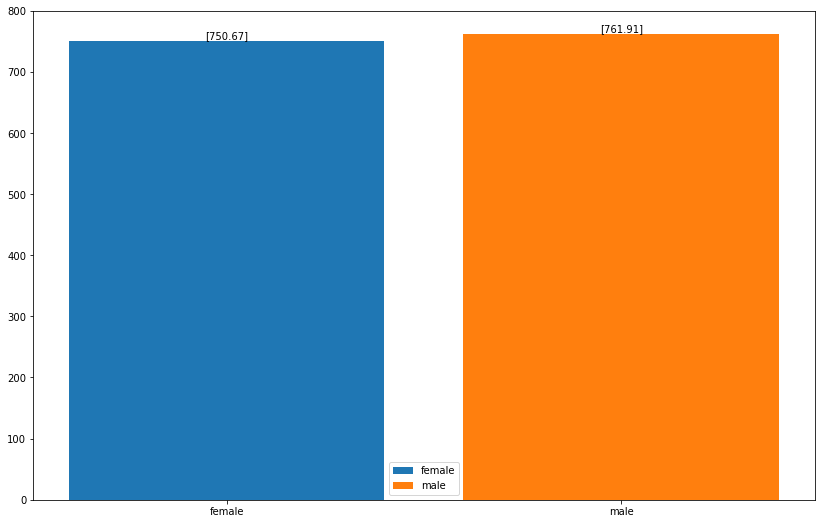

In [41]:
female= df[df['gender'] == 'female'][:10]
male= df[df['gender'] == 'male'][:10]

f= female.groupby("gender").GPA.sum()
m= male.groupby("gender").GPA.sum()

plt.figure(figsize=(14, 9))
plt.bar(x= f.index , height=f.values, label= 'female')
plt.bar(x= m.index , height=m.values , label= 'male')

plt.legend()

plt.text(0 , f.values , f.values , ha= 'center' , va= 'bottom')

plt.text(1 , m.values , m.values , ha= 'center' , va= 'bottom')
    
plt.show()

# Material stats

In [42]:
df.head(2)

,class,gender,GPA,Algebra,TotleCalculus,Statistics,Probability,Measure,Functional_analysis,cash_status,gradute
0,A,male,73.47,64,84.0,60,74,71,60,3,0
1,A,female,71.22,57,50.5,51,55,62,61,2,0


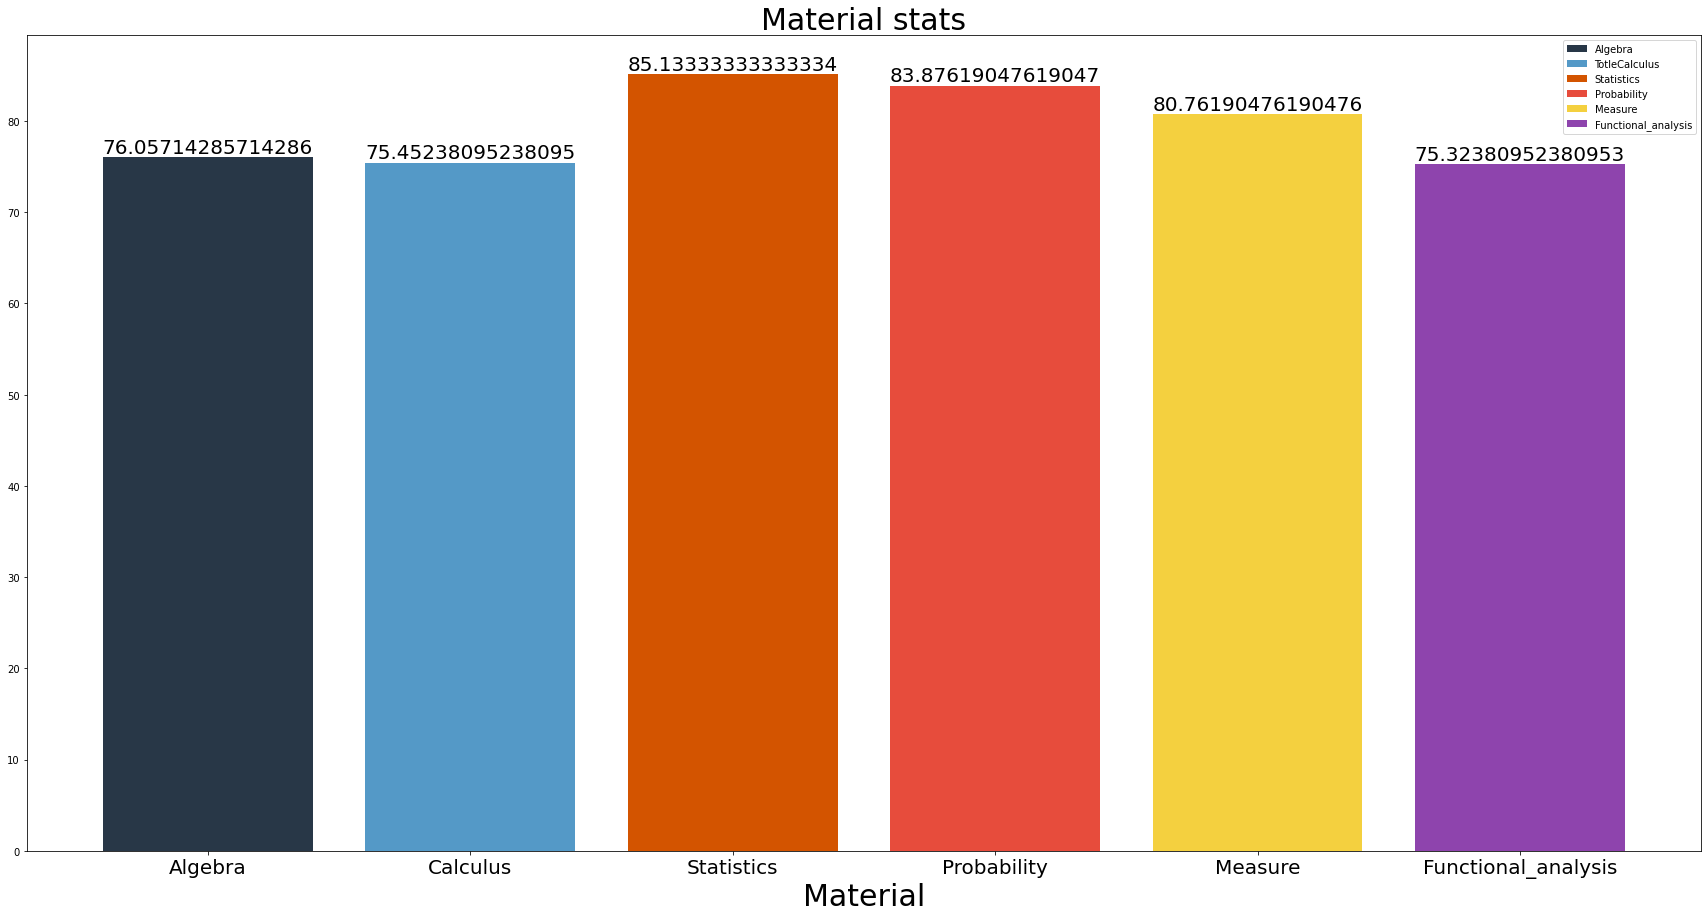

In [43]:
plt.figure(figsize=(30, 15));

plt.bar(x= "Algebra" , height=df.Algebra.mean() , label= "Algebra" , color= "#283747")
plt.text(0 , df.Algebra.mean() , df.Algebra.mean() , ha= 'center' , va= 'bottom' , fontsize= 20)

plt.bar(x= "Calculus" , height=df.TotleCalculus.mean() , label= "TotleCalculus" , color= "#5499C7")
plt.text(1 , df.TotleCalculus.mean() , df.TotleCalculus.mean() , ha= 'center' , va= 'bottom' , fontsize= 20)

plt.bar(x= "Statistics" , height=df.Statistics.mean(), label= "Statistics", color= "#D35400")
plt.text(2 , df.Statistics.mean() , df.Statistics.mean() , ha= 'center' , va= 'bottom' , fontsize= 20)

plt.bar(x= "Probability" , height=df.Probability.mean(), label= "Probability", color= "#E74C3C")
plt.text(3 , df.Probability.mean() , df.Probability.mean() , ha= 'center' , va= 'bottom' , fontsize= 20)

plt.bar(x= "Measure" , height=df.Measure.mean(), label= "Measure", color= "#F4D03F")
plt.text(4 , df.Measure.mean() , df.Measure.mean() , ha= 'center' , va= 'bottom' , fontsize= 20)

plt.bar(x= "Functional_analysis" , height=df.Functional_analysis.mean(), label= "Functional_analysis", color= "#8E44AD")
plt.text(5 , df.Functional_analysis.mean() , df.Functional_analysis.mean() , ha= 'center' , va= 'bottom' , fontsize= 20)

plt.xticks(fontsize= 20)
plt.title("Material stats" , fontsize= 30 )

plt.xlabel("Material" , fontsize= 30 )

plt.legend()

plt.show()

# What is the Top 10 GPA From Female or male?

In [44]:
df.head()

,class,gender,GPA,Algebra,TotleCalculus,Statistics,Probability,Measure,Functional_analysis,cash_status,gradute
0,A,male,73.47,64,84.0,60,74,71,60,3,0
1,A,female,71.22,57,50.5,51,55,62,61,2,0
2,A,female,74.56,47,59.5,60,61,68,64,0,1
3,A,female,72.89,46,55.0,60,29,54,51,0,0
4,A,female,70.11,49,54.0,60,66,66,61,0,0


In [45]:
Top = pd.DataFrame(df.Algebra.sort_values(ascending=False)[:10])
Top["Gender"] = df.gender

Top

,Algebra,Gender
101,98,male
97,98,male
65,95,male
75,95,female
87,95,female
84,94,female
96,94,male
104,93,male
58,93,female
93,93,female


female    68
male      37
Name: gender, dtype: int64
Gender
female    470
male      478
Name: Algebra, dtype: int64


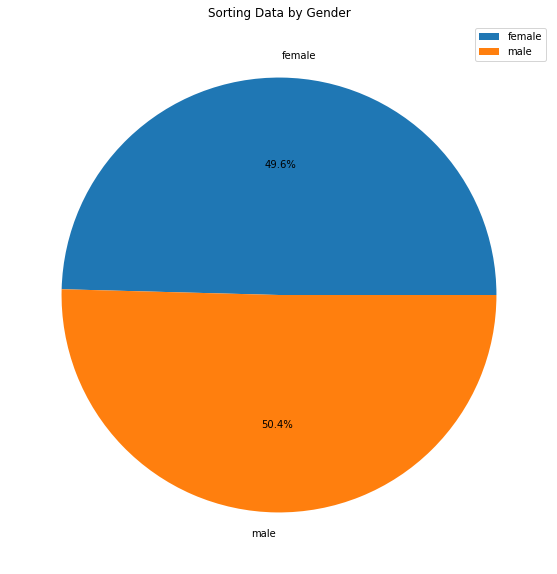

In [46]:
index= Top.groupby("Gender").Algebra.sum().index
values= Top.groupby("Gender").Algebra.sum().values

plt.figure(figsize=(10, 10));
print(df["gender"].value_counts())
print(Top.groupby("Gender").Algebra.sum())
plt.title("Sorting Data by Gender")
plt.pie(x= values , labels=  index ,  autopct= "%1.1f%%");

plt.legend();
plt.show()

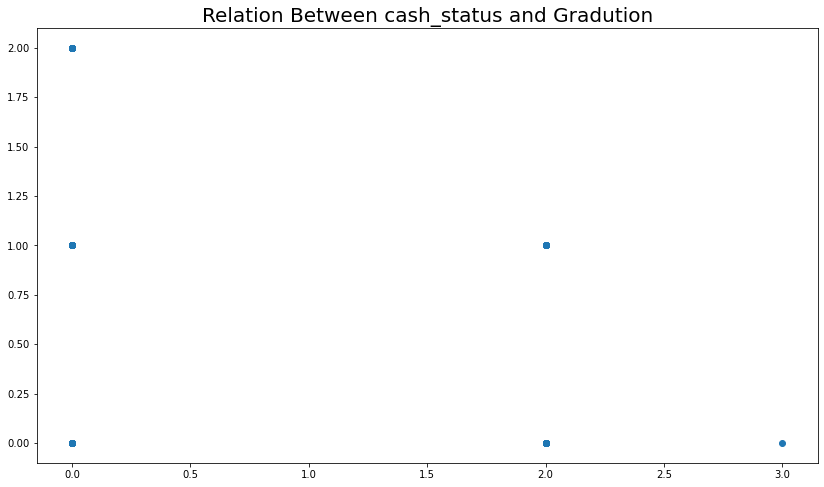

In [47]:
plt.figure(figsize=(14, 8))

plt.title("Relation Between cash_status and Gradution" , fontsize= 20)
plt.scatter(df.cash_status , df.gradute)